## MNIST 맛보기
- 손글씨 숫자 인식

In [1]:
import sys, os
sys.path.append("../../dataset")
import numpy as np
import pickle
from mnist import load_mnist
import matplotlib.pylab as plt

In [2]:
# (train_image_data, train_label_data), (test_image_data, test_label_data)=load_mnist(flatten = True, normalize = False)

In [3]:
# print(train_image_data.shape)
# print(train_label_data.shape)
# print(test_image_data.shape)
# print(test_label_data.shape)

In [4]:
# image = train_image_data[0]
# image.shape

In [5]:
# image_reshaped = image.reshape(28,28)
# image_reshaped.shape

In [6]:
# label = train_label_data[0]
# plt.figure(figsize = (4,4))
# plt.title("sample of " + str(label))
# plt.imshow(image_reshaped, cmap = "gray")
# plt.show

In [7]:
# def test_mnist(x):
#     image = train_image_data[x]
#     image_reshaped = image.reshape(28,28)
    
#     label = train_label_data[x]
 
#     plt.figure(figsize = (4,4))
#     plt.title("sample of " + str(label))
#     plt.imshow(image_reshaped, cmap = "gray")
#     plt.show

In [8]:
# test_mnist(59999)

## 신경망의 손글씨 숫자 추론
- 기존 학습된 자료를 토대로 정확도 확인

In [9]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [10]:
def softmax(matrix):
    maximum_of_matrix = np.max(matrix)
    difference_from_maximum = matrix - maximum_of_matrix
    exponential_of_difference = np.exp(difference_from_maximum)
    sum_of_exponential= np.sum(exponential_of_difference)
    y = exponential_of_difference / sum_of_exponential
    return y

In [11]:
def get_data():
    (image_train, label_train), (image_test, label_test)=load_mnist(flatten = True, normalize = False)
    return image_test, label_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2)+b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3)+b3
    y = softmax(a3)
    
    return y
    

In [12]:
images, labels = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(images)):
    y = predict(network, images[i])
    p = np.argmax(y)
    if p == labels[i]:
        accuracy_cnt += 1
        
print("Accuracy:"+str(float(accuracy_cnt) / len(images)))

Accuracy:0.9207


In [13]:
## 배치 구현

images, labels = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(images), batch_size):
    x_batch = images[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == labels[i:i+batch_size])
        
print("Accuracy:"+str(float(accuracy_cnt) / len(images)))

Accuracy:0.9207


## Loss Function (손실함수)
- mse ( 평균 제곱 오차 )
- cee ( 교차 엔트로피 오차 )

In [14]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
true = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [15]:
def mean_squared_error(y, t):
    return 0.5*np.sum((y-t)**2)

In [16]:
mean_squared_error(np.array(y), np.array(true))

0.09750000000000003

In [17]:
y=[0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(true))

0.5975

In [18]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

In [19]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
true = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [20]:
cross_entropy_error(np.array(y), np.array(true))

0.510825457099338

In [21]:
y=[0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(true))

2.302584092994546

### mini - batch

In [22]:
(x_train, t_train), (x_test, t_test)=load_mnist(normalize = True, one_hot_label=true)
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [23]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [24]:
np.random.choice(60000, 10)

array([26319, 54771, 44941, 23757,  3511, 17059, 55020, 41366, 15672,
       19400])

In [25]:
def cross_entropy_error_one_hot(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y))/batch_size

In [26]:
def cross_entropy_error_label(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t]))/batch_size

## Numerical Different And Gradiant
- 손실함수의 최소값을 갖는 가중치를 찾기 위해 사용한다.

In [27]:
def numerical_differential(f, x):
    h = 1e-4
    return (f(x+h)-f(x-h))/(2*h)

In [28]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

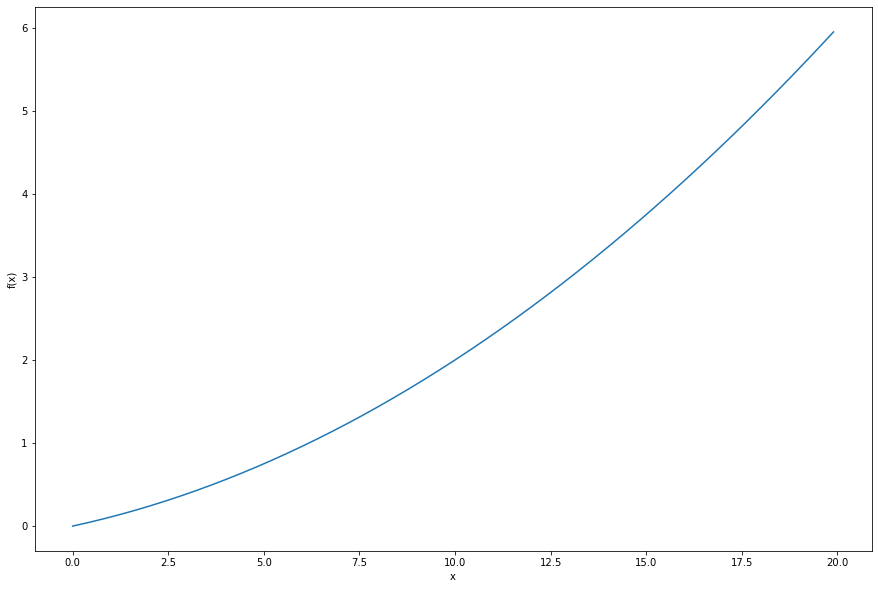

In [29]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.figure(figsize=(15, 10))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

In [30]:
numerical_differential(function_1, 5)

0.1999999999990898

In [31]:
numerical_differential(function_1, 10)

0.2999999999986347

In [32]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [33]:
def numerical_gradient(f, x):
    h = 1e-3
    grad = np.zeros_like(x)
    
    for index in range(x.size):
        tmp_val = x[index]
        x[index] = tmp_val+h
        fxh1 = f(x)
        
        x[index] = tmp_val-h
        fxh2 = f(x)
        
        grad[index] = (fxh1 - fxh2 )/(2*h)
        x[index] = tmp_val
        
    return grad

In [34]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [35]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [36]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

In [37]:
def gradient_descent(f, init_x, lr=0.01, step_num = 100):
    x = init_x
    x_history = []
    
    for i in range(step_num):
        x_history.append(x.copy())
        grad = numerical_gradient(f, x)
        x -= lr*grad
    return x, np.array(x_history)

In [38]:
init_x = np.array([-3.0, 4.0])
lr = 0.1
step_num = 100
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)
print(x)

[-6.11110793e-10  8.14814391e-10]


## 신경망에서의 기울기 예제

In [39]:
import sys, os
import numpy as np

In [49]:
def softmax(matrix):
    maximum_of_matrix = np.max(matrix)
    difference_from_maximum = matrix - maximum_of_matrix
    exponential_of_difference = np.exp(difference_from_maximum)
    sum_of_exponential= np.sum(exponential_of_difference)
    y = exponential_of_difference / sum_of_exponential
    return y

def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

def numerical_gradient(f, x):
    h = 1e-3
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val)+h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val
        it.iternext()
        
    return grad

In [50]:
class simpleNet:
    def __init__(self):
        self.w = np.random.randn(2,3)
        
    def predict(self, x):
        return np.dot(x, self.w)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [51]:
net = simpleNet()
print(net.w)

[[ 1.3561816  -1.39825043  0.32873279]
 [-0.70315506 -0.40811695  0.78047438]]


In [52]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 0.18086941 -1.20625551  0.89966662]


In [53]:
np.argmax(p)

2

In [54]:
t = np.array([0, 0, 1])
net.loss(x, t)

0.47565710604229283

In [55]:
def f(w):
    return net.loss(x, t)

In [56]:
dw = numerical_gradient(f, net.w)
print(dw)

[[ 0.18172145  0.04539265 -0.2271141 ]
 [ 0.27258219  0.06808898 -0.34067115]]


In [57]:
f = lambda w: net.loss(x, t)
dw = numerical_gradient(f, net.w)
print(dw)

[[ 0.18172145  0.04539265 -0.2271141 ]
 [ 0.27258219  0.06808898 -0.34067115]]


## 2층 신경망 클래스 구현하기!

In [58]:
import sys, os
sys.path.append("../../dataset")
import numpy as np
import pickle
from mnist import load_mnist
import matplotlib.pylab as plt

In [82]:
def step_function(x):
    return np.array(x>0, dtype=np.int)
def sigmoid(x):
    return 1/(1+np.exp(-x))
def relu(x):
    return np.maximum(0,x)
def relu_grad(x):
    grad = np.zeros(x)
    grad[x>=0] = 1
    return grad
def sigmoid_grad(x):
    return (1.0-sigmoid(x))*sigmoid(x)
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x-np.max(x, axis=0)
        y = np.exp(x)/np.sum(np.exp(x),axis=0)
        return y.T
    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))
def mean_squared_error(y,t):
    return 0.5*np.sum((y-t)**2)
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    if t.size == y.size:
        t = t.argmax(axis=1)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t]+1e-7)) / batch_size
def softmax_loss(X,t):
    y = softmax(X)
    return cross_entropy_error(y, t)
def numerical_gradient(f, x):
    h = 1e-3
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val)+h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val
        it.iternext()
        
    return grad

In [83]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {'W1':weight_init_std*np.random.randn(input_size, hidden_size),
                       'b1':np.zeros(hidden_size),
                       'W2':weight_init_std*np.random.randn(hidden_size, output_size),
                       'b2':np.zeros(output_size),
        }
        self.count = 0
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = sigmoid(a2)
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y=self.predict(x)
        y=np.argmax(y, axis=1)
        t=np.argmax(t, axis=1)
        
        accuracy = np.sum(y==t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads={'W1':numerical_gradient(loss_W, self.params['W1']),
               'b1':numerical_gradient(loss_W, self.params['b1']),
               'W2':numerical_gradient(loss_W, self.params['W2']),
               'b2':numerical_gradient(loss_W, self.params['b2'])
               }

        return grads
    
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = sigmoid(a2)
        
        dy = (y-t)/batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1)*dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)
        
        return grads

In [84]:
net = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [85]:
print(net.params["W1"].shape)
print(net.params["b1"].shape)
print(net.params["W2"].shape)
print(net.params["b2"].shape)

(784, 50)
(50,)
(50, 10)
(10,)


In [86]:
x = np.random.rand(100, 784)
y = net.predict(x)

In [87]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x,t)

In [88]:
print(grads["W1"].shape)
print(grads["b1"].shape)
print(grads["W2"].shape)
print(grads["b2"].shape)

(784, 50)
(50,)
(50, 10)
(10,)


In [89]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [90]:
train_loss_list=[]

In [91]:
iters_num=10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
iter_per_epoch = max(train_size/batch_size, 1)

In [92]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [93]:
for i in range(iters_num):
    batch_mask=np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate*grad[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch==0:
        print("loss: "+str(loss))

loss: 0.9902821457676536
loss: 0.87235415219058
loss: 0.6404289363945199
loss: 0.5333245284153495
loss: 0.4270008651674479
loss: 0.21490137537027182
loss: 0.16082640471359821
loss: 0.20447233625240613
loss: 0.3847219690232651
loss: 0.3947426993407759
loss: 0.3433883604472474
loss: 0.28703746942659214
loss: 0.19284757461280155
loss: 0.3256487285100478
loss: 0.14376590000912987
loss: 0.2904498090769955
loss: 0.18989475215004237


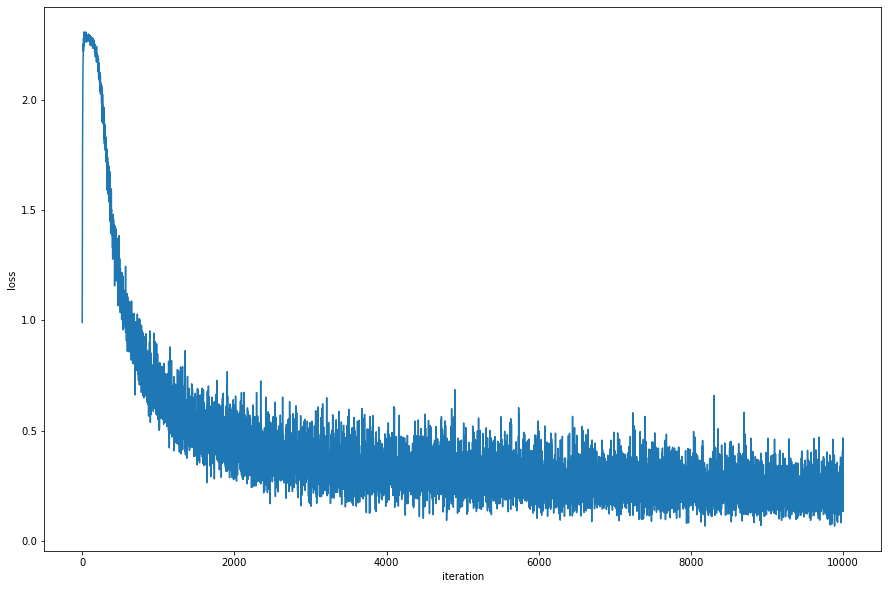

In [94]:
x = np.arange(len(train_loss_list))

plt.figure(figsize=(15,10))
plt.plot(x, train_loss_list, label='train acc')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

In [96]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [97]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

In [98]:
iters_num = 10000
train_size=x_train.shape[0]
batch_size=100
learning_rate=0.1
iter_per_epoch = max(train_size/batch_size, 1)

In [99]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [100]:
for i in range(iters_num):
    batch_mask=np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate*grad[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch==0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("loss: "+str(loss)+", train acc: "+str(train_acc)+", test acc: "+str(test_acc))

loss: 0.9956643197006106, train acc: 0.10218333333333333, test acc: 0.101
loss: 0.9626683077368005, train acc: 0.7686166666666666, test acc: 0.7771
loss: 0.5389851257715845, train acc: 0.8704333333333333, test acc: 0.8763
loss: 0.34324214249971524, train acc: 0.8959333333333334, test acc: 0.9013
loss: 0.3292806536475013, train acc: 0.90495, test acc: 0.91
loss: 0.30000287371784373, train acc: 0.9119333333333334, test acc: 0.9159
loss: 0.3485709394339313, train acc: 0.9171, test acc: 0.921
loss: 0.2108712634610105, train acc: 0.9216333333333333, test acc: 0.924
loss: 0.2292544185892837, train acc: 0.9254333333333333, test acc: 0.929
loss: 0.32539046767695917, train acc: 0.9287666666666666, test acc: 0.9296
loss: 0.13883949023430422, train acc: 0.93195, test acc: 0.9322
loss: 0.22603853619258232, train acc: 0.9340166666666667, test acc: 0.9348
loss: 0.20076395784654502, train acc: 0.9368333333333333, test acc: 0.9376
loss: 0.21953877256648943, train acc: 0.9384333333333333, test acc: 0.9

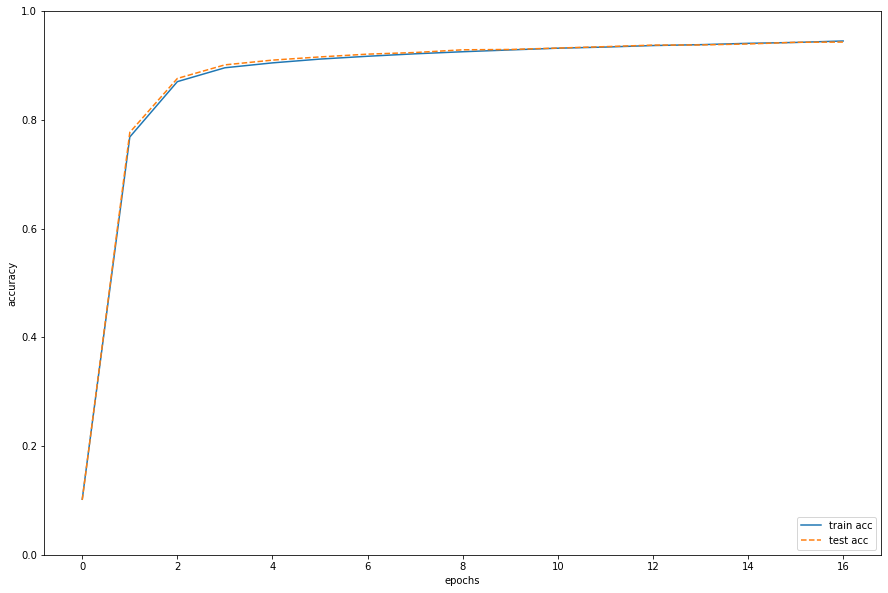

In [101]:
markers = {'train':'o',
           'test': 's'}
x = np.arange(len(train_acc_list))

plt.figure(figsize=(15,10))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0,1.0)
plt.legend(loc='lower right')
plt.show()